<img src="https://i.ibb.co/K5n24Nd/1.png"  alt="KCode Banner"  />

<a href="https://www.linkedin.com/in/kauebr/"><img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" width="30" ></a> <a href="mailto: kauemandarino@gmail.com"><img src="https://cdn-icons-png.flaticon.com/512/5968/5968534.png" width="30" ></a><a href="
https://api.whatsapp.com/send?phone=5541991835800&text=Oi"> <img src="https://imagepng.org/wp-content/uploads/2017/08/whatsapp-icone-1.png" width="30" ></a><a href="https://github.com/kauebr/"><img src="https://github.githubassets.com/images/modules/logos_page/Octocat.png" width="30" ></a>



# 2ª Coleta de valores das Ações(apenas Gerdau e CSN)
## Objetivo:
* Obter dados financeiros, referentes as ações das empresas: `Gerdau` e `CSN` de 2013 à 2022;
* Limpar os dados;
* Plotar gráficos, para verificar visualmente a consistência dos dados;
* Exportar as cotações em formato `.csv`


<h1>Índice</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href=#'a'>Minerando os Dados</a></li>
        <li><a href=#2>Limpeza e Validação dos Dados</a></li>
        <li><a href=#1>Modelando e Exportando os Dados</a></li>
    *O  redirecionamento automático do índice não funciona no GitHub, para utilizá-lo, baixe o notebook em sua máquina
    </ol>
</div>
<br>
<hr>



Importando bibliotecas

In [1]:
from pandas_datareader import data as web
import pandas as pd
import matplotlib.pyplot as plt

## <h2 id="a">Minerando os Dados</h2>

Declarando datas de referência para nossa query, códigos e nomes das empresas na Bovespa. `(Estes valores foram apurados no` [Yahoo Finance](https://finance.yahoo.com/)`)`.


In [2]:
empresas = {'GGBR4.SA': 'Gerdau preferenciais', 'GGBR3.SA': 'Gerdau Metalúrgica preferenciais',
            'CSNA3.SA': 'CSN'}  # Declarando dicionário com as empresas e os códigos na bolsa de valores.


# Informando parâmetros da query:
tempo_inicial = ('01-01-2013')
tempo_final = ('07-31-2022')

Utilizando um for para realizar nossa query

GGBR4.SA(Gerdau preferenciais):


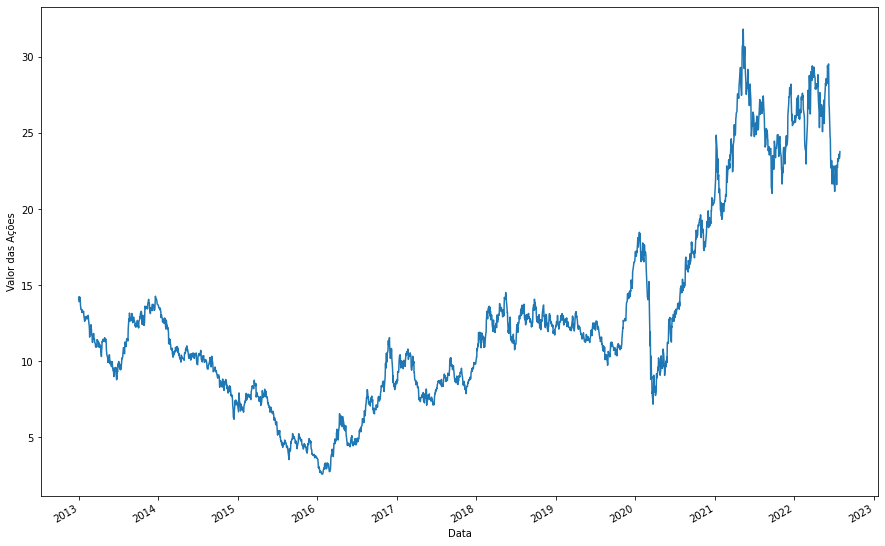

GGBR3.SA(Gerdau Metalúrgica preferenciais):


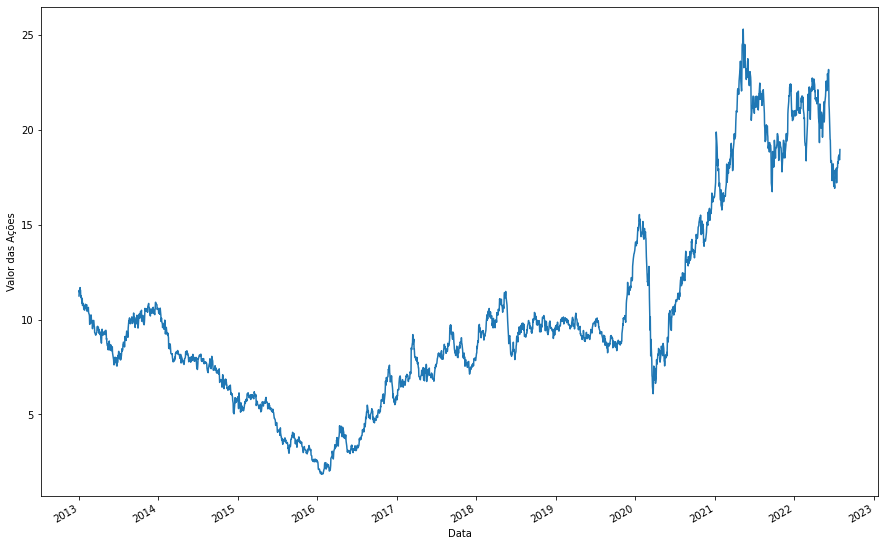

CSNA3.SA(CSN):


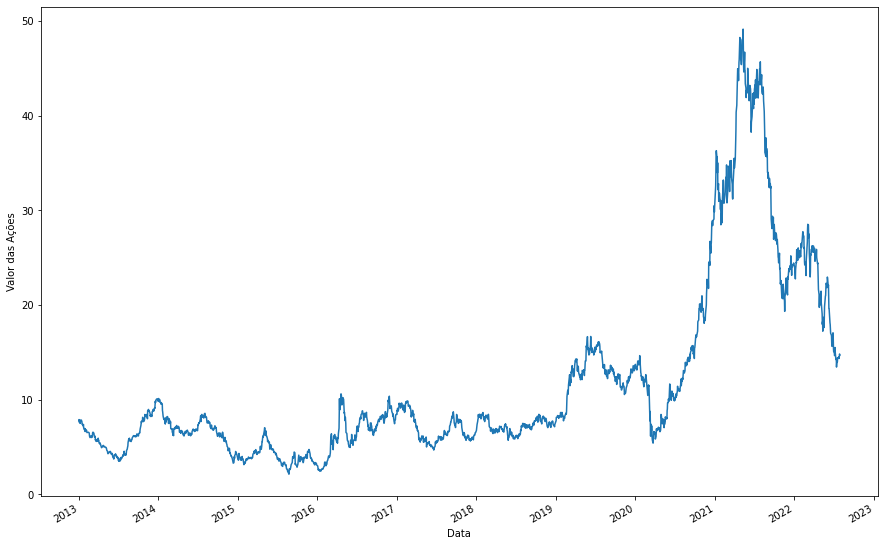

In [3]:
for cod in empresas: # Repetindo uma vez para cada empresa no dicionário "empresas" supra declarado.
    cotacao = web.DataReader(cod, data_source='yahoo', start=tempo_inicial, end=tempo_final) # Query de cotação;
    print(f'{cod}({empresas[cod]}):') # Escrevendo o nome de cada empresa antes do seu respectivo gráfico;
    cotacao['Adj Close'].plot(figsize=(15, 10)) # Escolhi o parâmetro de fechamento ajustado na fonte de dados;
    plt.xlabel("Data") # Título do eixo X;
    plt.ylabel("Valor das Ações") # Título do eixo Y;
    plt.show() # Mostrando o gráfico plotado.

## <h2 id="2">Limpeza e validação dos dados</h2>

> Segundo verificação visual, os valores estão consistentes.

Plotando um gráfico unificado:

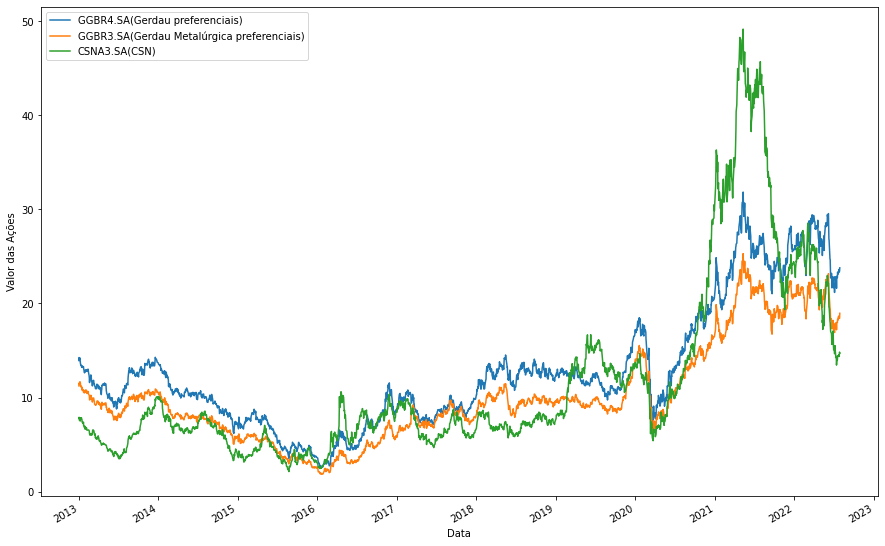

In [4]:
for cod in empresas: # Estrutura de repetição correndo todas empresas no nosso dicionário;
    cotacao = web.DataReader(cod, data_source='yahoo', start=tempo_inicial, end=tempo_final)
    cotacao['Adj Close'].plot(figsize=(15, 10)) # Declarando o tamanho da figura do gráfico;
    plt.xlabel("Data") # Declarando rótulo do eixo X;
    plt.ylabel("Valor das Ações") # Declarando rótulo do eixo Y;   
plt.legend(['GGBR4.SA(Gerdau preferenciais)', 'GGBR3.SA(Gerdau Metalúrgica preferenciais)', 'CSNA3.SA(CSN)']) # Criando uma legenda para o gráfico;
plt.show() # Como eu não pedi para o Python mostrar a figura a cada repetição do laço 'for', ele mostra só agora, mas com todas as empresas juntas. 


Salvei este gráfico na pasta do ciclo, pois é interessante para nossa posterior análise exploratória dos dados.

## <h3 id="3">Modelando e Exportando os dados </h3>

Agora vou criam uma matriz com todos os dados, para pode posteriormente exportá-la

Primeiramente vou criar o dataframe com as datas na primeira coluna:

In [5]:
cotacao = web.DataReader('GGBR4.SA', data_source='yahoo', start=tempo_inicial, end=tempo_final) # Puxando uma cotação qualquer com o intervalo de datas desejado;
cotacao.reset_index(inplace=True) # As datas estavam como índice, aqui transformo-as em coluna;
cotacao.rename(columns={'Date':'Data'}, inplace=True) # Renomeando a coluna de "Date", para "Data";
df = cotacao['Data'].copy() # Criando uma série, já com as datas(já havia criado uma antes, mas aqui mudou a data, então sobrescrevi.)
df.to_csv('C:/Users/manda/OneDrive/Documents/GitHub/Insights/Dados Siderurgia Brasileira 2016~2022/2 Entrega - Cliclo 2/Passo 03 e 04 - Coleta e limpeza dos dados/Dados/datas.csv') # Exportando a série para um arquivo .csv
df = pd.read_csv('C:/Users/manda/OneDrive/Documents/GitHub/Insights/Dados Siderurgia Brasileira 2016~2022/2 Entrega - Cliclo 2/Passo 03 e 04 - Coleta e limpeza dos dados/Dados/datas.csv', usecols=[1]) # Criando um frame de dados a partir do .csv exportado
df


,Data
0,2013-01-02
1,2013-01-03
2,2013-01-04
3,2013-01-07
4,2013-01-08
...,...
2374,2022-07-25
2375,2022-07-26
2376,2022-07-27
2377,2022-07-28


Agora vou fazer uma estrutura de repetição "for", para: puxar as cotações, resetar o index, renomear a coluna e adicionar ao nosso frame de dados.

In [6]:
for cod in empresas:
    nome = cod[:5] # Usando o fatiamento de string para defir o nome da empresa que rodará no loop;
    cotacao = web.DataReader(cod, data_source='yahoo', start=tempo_inicial, end=tempo_final) # Puxando a cotação;
    cotacao.reset_index(inplace=True) # Reiniciando o índice, que estava como as datas, para ele ficar numérico;
    cotacao.rename(columns={'Adj Close':nome}, inplace=True) # Renomeando a coluna de fechamento da ação, para o nome da empresa(loop);
    coluna_extraida = cotacao[nome] # extraindo a coluna
    df = df.join(coluna_extraida) # adcionando a coluna ao nosso frame de dados.
df # Exibindo o dataframe

,Data,GGBR4,GGBR3,CSNA3
0,2013-01-02,13.934847,11.241102,7.790151
1,2013-01-03,14.252389,11.538377,7.901265
2,2013-01-04,14.030852,11.441590,7.604966
3,2013-01-07,14.208083,11.683558,7.567929
4,2013-01-08,13.920080,11.545290,7.500027
...,...,...,...,...
2374,2022-07-25,23.619736,18.673210,14.540000
2375,2022-07-26,23.376635,18.470135,14.360000
2376,2022-07-27,23.347462,18.412115,14.660000
2377,2022-07-28,23.464149,18.431454,14.830000


 Aqui podemos ver o poder do Python, obtemos um dataframe estruturado com `9516` entradas utilizando poucas linhas de código, processo este que é escalonável, ou seja, se eu quisesse os mesmos dados, mas para outras 10 empresas diferentes, poderia obtê-los mudando apenas a uma linha(lista das empresas) no código.

Agora vou extrair e exportar os arquivos no formato `.csv`

In [9]:
df.to_csv('C:/Users/manda/OneDrive/Documents/GitHub/Insights/Dados Siderurgia Brasileira 2016~2022/2 Entrega - Cliclo 2/Passo 05 - Exploração dos dados/Cotaçoes de CSN e GERDAU.csv') # Salvando nosso DataFrame como arquivo .csv (texto separado por vírgulas)

Adiante, vou comparar o valor da variação destas ações com a variação da taxa Selic, para ver se o investimento nas mesmas é rentável em relação investimento no tesouro direto.

<hr>